In [55]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
index_frame = pd.read_excel(r'data/IndexFrameIBOV.xlsx')
display(index_frame.head())

,Date,Close
0,1993-04-27,24.500000
1,1993-04-28,24.299999
2,1993-04-29,23.700001
3,1993-04-30,24.100000
4,1993-05-01,24.100000


In [57]:
close_prices_variations_abs = []
close_prices_variations_per = []

for i in tqdm(range(1,len(index_frame)), position=0, leave=True):
    variation = index_frame.iloc[i]['Close'] - index_frame.iloc[i-1]['Close']
    variation_percent = variation/index_frame.iloc[i-1]['Close']
    close_prices_variations_abs.append(variation)
    close_prices_variations_per.append(variation_percent)

100%|██████████████████████████████████████████████████████████████████████████| 10499/10499 [00:04<00:00, 2219.73it/s]


In [58]:
index_frame = index_frame.drop(labels=0, axis = 0)
index_frame['AbsVar'] = close_prices_variations_abs
index_frame['AbsPer'] = close_prices_variations_per
index_frame = index_frame[index_frame["AbsPer"] != 0]
#index_frame['LogFreq'] = np.log(np.array(index_frame['AbsPer']))

In [59]:
index_frame = index_frame.set_index('Date')

In [60]:
begin_date = pd.to_datetime('2000-01-01')

In [61]:
interval_data = index_frame.loc[begin_date:]
display(interval_data.head())

,Close,AbsVar,AbsPer
Date,,,
2000-01-03,16930.0,-162.0,-0.009478
2000-01-04,15851.0,-1079.0,-0.063733
2000-01-05,16245.0,394.0,0.024856
2000-01-06,16107.0,-138.0,-0.008495
2000-01-07,16309.0,202.0,0.012541


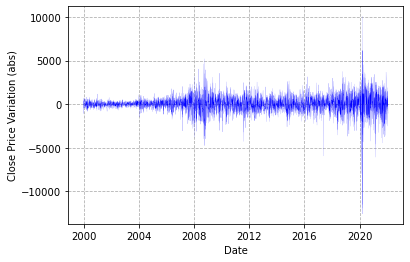

In [62]:
fig = plt.figure()
plt.plot(interval_data.index, interval_data['AbsVar'], lw=0.1, color='blue')
plt.grid(linestyle='--')
plt.ylabel('Close Price Variation (abs)')
plt.xlabel('Date')
plt.show()
fig.savefig(r'results/variation_abs.pdf', format='pdf', dpi=1200)
plt.close(fig)

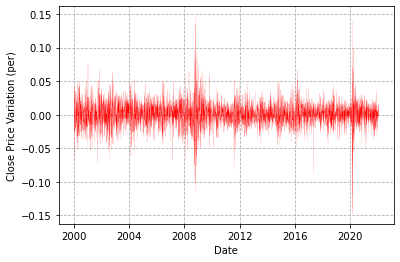

In [63]:
fig = plt.figure()
plt.plot(interval_data.index, interval_data['AbsPer'], lw=0.1, color='red')
plt.grid(linestyle='--')
plt.ylabel('Close Price Variation (per)')
plt.xlabel('Date')
#plt.ylim(-1,1)
plt.show()
fig.savefig(r'results/variation_per1.pdf', format='pdf', dpi=1200)
plt.close(fig)

<Figure size 432x288 with 0 Axes>

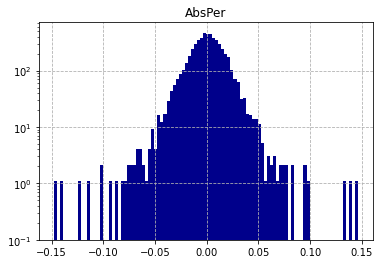

In [64]:
fig = plt.figure()
kwargs=dict(kde_kws={'linewidth':1})
bins_interval = [100]
for number_bin in bins_interval:
    fig, ax = plt.subplots()
    interval_data.hist(ax=ax, bins=number_bin, bottom=0.1,column='AbsPer', color ='darkblue')
    ax.set_yscale('log')
    plt.grid(linestyle='--')
    plt.show()
    fig.savefig(r'results/hist({}).pdf'.format(number_bin), format='pdf', dpi=1200)
    plt.close(fig)